In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
import nltk
import string

In [2]:
def plot(x=None, y=None, hue=None, data=None,name='',barplot=False,countplot=False,boxplot=False,factorplot=False):
    data=pd.DataFrame(data)
    plt.figure(figsize=(14,9))
    if type(data[x].values[1])==str:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        data[x]=data[x].apply(lambda y:treat_cat(y))
        data[x]=le.fit_transform(data[x])
    else:
        me=np.mean(data[x])
        data[x]=data[x].apply(lambda y: treat_num(y,m=me))
    try:
        print(name,'\n')
        data[x].hist()
        plt.show()
    except:
        print('cannot plot histogram\n')
    
    try:
        print(name,'\n')
        sns.distplot(train[x])
        plt.show()
    except:
        print('cannot plot distplot\n')
        
    if barplot:
        try:
            print(name,'\n')
            sns.barplot(x=x,y=y,hue=hue,data=data)
            plt.show()
        except:
            print('cannot plot barplot\n')
    if countplot:        
        try:
            print(name,'\n')
            sns.countplot(data[x])
            plt.show()
        except:
            print('cannot plot countplot\n')
    if boxplot:        
        try:
            print(name,'\n')
            sns.boxplot(x=x,y=y,hue=hue,data=data)
            plt.show()
        except:
            print('cannot plot boxplot\n')  
    if factorplot:        
        try:
            print(name,'\n')
            data=pd.DataFrame(data)
            sns.factorplot(x=x,y=y,data=data,size=14)
            plt.show()
        except:
            print('cannot plot factorplot\n')  
            
def plotHeatMap(df, size=(16,9),an=True):
    plt.figure(figsize=size)
    cmap = plt.cm.viridis
    sns.heatmap(df.corr(),cmap=cmap,linewidths=0.2,vmax=1, linecolor="white", square=True,annot=an)
    plt.show()

In [4]:
def stem_tokens(tokens, stemmer):
    try:
        stemmed = []
        for item in tokens:
            stemmed.append(stemmer.stem(item))
        return stemmed

def tokenize(text,stem=True,is_sentence=False):
    tokens = word_tokenize(text)
    stop_words=set(stopwords.words('english'))
    token_w=[i for i in tokens if i not in stop_words]
    stems=token_w
    if stem:
        stems = stem_tokens(token_w, PorterStemmer())
    stems = list(set(stems))
    if is_sentence:
        stems=' '.join(stems)
    return stems

def clean(strr,stem=True,is_sent=False):
    strr=strr.lower()
    #translator for removing punctuations
    t_lator=str.maketrans('','',string.punctuation)
    strr=strr.translate(t_lator)
    return tokenize(strr,stem=stem,is_sentence=is_sent)

def remove_special_symbol(strr,pat):
    return strr.replace(pat," ")

def remove_punctuation(strr):
    t_lator=str.maketrans('','',string.punctuation)
    strr=strr.translate(t_lator)
    return strr

def drop(data=None,col=None):
    return data.drop([i for i in col],axis=1)
    
def null_values(data):
     print('null values = '+str(len(data[data!=data])))
        
def treat_num(x,m):
    if x!=x:
        return m
    else:
        return x

    
def describe(data,with_plot=True):
    null_values(data)
    #for uniqueness
    try:
        if len(set(data.values))==len(data.values):
            print('is_unique : Yes')
        else:
            print('is_unique : No')
    except:
        pass
    
    if len(set(data.values.ravel()))<=10:
        print(set(data.values.ravel()))
        count(data=data)
        
    if data_type(data)==str:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        data=data.apply(lambda y:treat_cat(y))
        data=le.fit_transform(data)
    else:
        me=np.mean(data)
        data=data.apply(lambda y: treat_num(y,m=me))
    data=pd.DataFrame(data)
    max_min(data)
    non_zero(data)
    print(data.describe(),'\n')
    if with_plot:
        plot(x=[i for i in data.columns][0],data=data)


#**************************************************************************************************************************	

def non_zero(data):
    data=pd.DataFrame(data)
    print('non zero values = '+str(len(data[data.values.ravel()!=0]))+
         '   zero values = '+str(len(data[data.values.ravel()==0])))

def drop(data=None,col=None):
    return data.drop([i for i in col],axis=1)
    
def null_values(data):
     print('null values = '+str(len(data[data!=data])))
        
def treat_num(x,m):
    if x!=x:
        return m
    else:
        return x
 
def max_min(data):
    data=pd.DataFrame(data)
    print('max = '+str(max(data.values.ravel()))+'  min = '+str(min(data.values.ravel())))

def data_type(data):
    data=pd.DataFrame(data)
    for i in data.values.ravel():
        if i==i:
            return type(i)

#	used for outlier detection and removal
 
def show_percentile(x=None,data=None,lb=0,ub=100):
    lb,ub=np.percentile(data[x],q=(lb,ub),axis=0)
    print('sacrifice : ',len(data[x])-len(data[(data[x]>=lb) &(data[x]<=ub)]))
    describe(data[x][(data[x]>=lb) &(data[x]<=ub)])
    
def apply_percentile(x=None,data=None,lb=0,ub=100):
    lb,ub=np.percentile(data[x],q=(lb,ub),axis=0)
    return data[(data[x]>=lb) &(data[x]<=ub)]

#**************************************************************************************************************************	

def count(data):
    from collections import Counter
    print(Counter(data))
    
def consider_unknown(data,li):
    if data in li:
        return data
    else :
        return 'unknown'


IndentationError: unexpected unindent (<ipython-input-4-273d3e317aa7>, line 8)

In [5]:
train=pd.read_csv('../Data/train.csv')
test=pd.read_csv('../Data/test.csv')

In [6]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [8]:
train.shape,test.shape

((159571, 8), (153164, 2))

In [12]:
train[train['toxic']==1].tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0
159554,ffbdbb0483ed0841,and i'm going to keep posting the stuff u dele...,1,0,1,0,1,0


toxic
null values = 0
is_unique : No
{0, 1}
Counter({0: 144277, 1: 15294})
max = 1  min = 0
non zero values = 15294   zero values = 144277
               toxic
count  159571.000000
mean        0.095844
std         0.294379
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000 

 



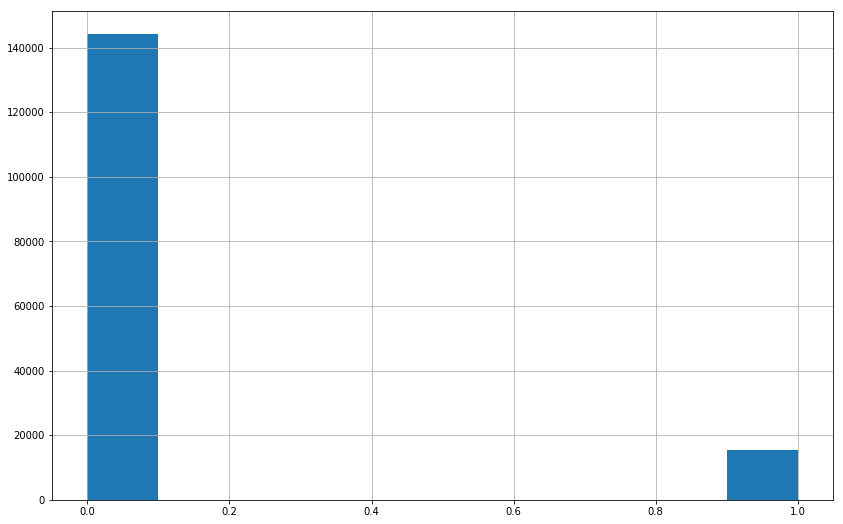

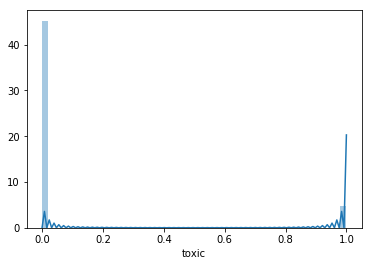

severe_toxic
null values = 0
is_unique : No
{0, 1}
Counter({0: 157976, 1: 1595})
max = 1  min = 0
non zero values = 1595   zero values = 157976
        severe_toxic
count  159571.000000
mean        0.009996
std         0.099477
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000 

 



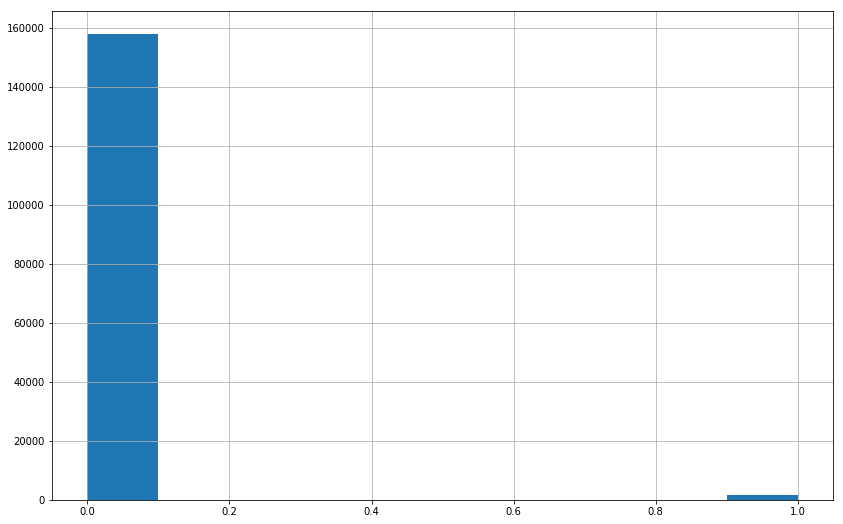

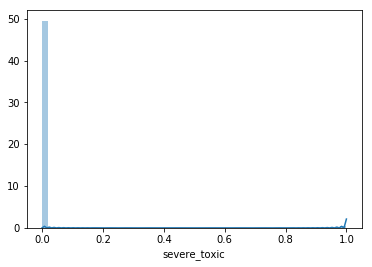

obscene
null values = 0
is_unique : No
{0, 1}
Counter({0: 151122, 1: 8449})
max = 1  min = 0
non zero values = 8449   zero values = 151122
             obscene
count  159571.000000
mean        0.052948
std         0.223931
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000 

 



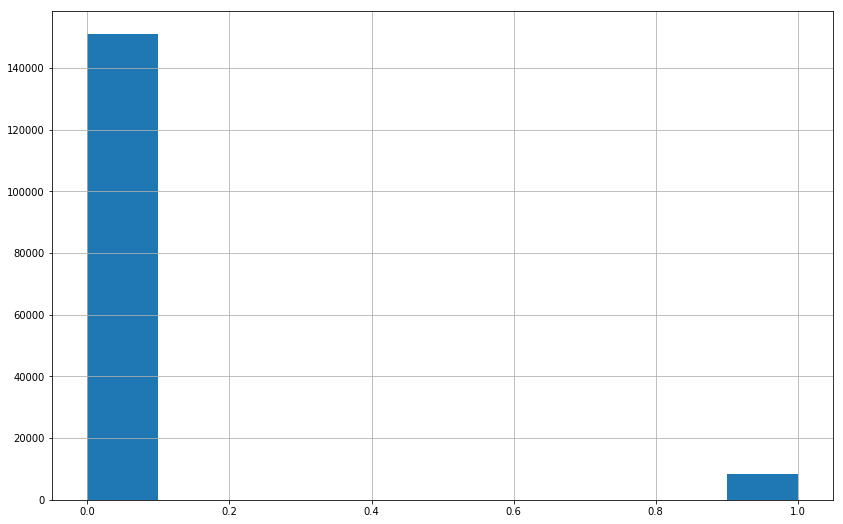

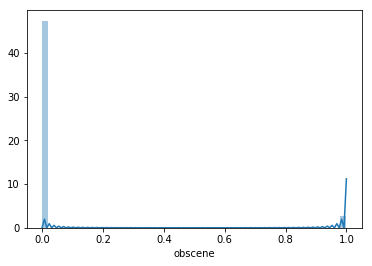

threat
null values = 0
is_unique : No
{0, 1}
Counter({0: 159093, 1: 478})
max = 1  min = 0
non zero values = 478   zero values = 159093
              threat
count  159571.000000
mean        0.002996
std         0.054650
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000 

 



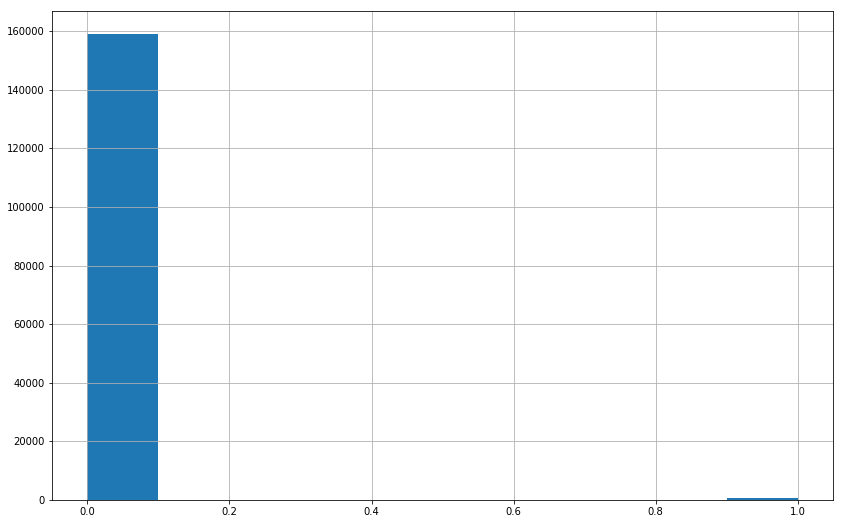

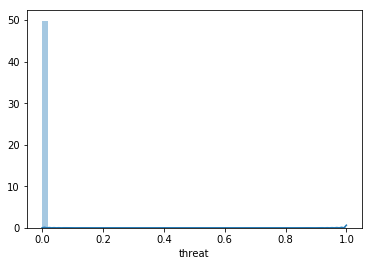

insult
null values = 0
is_unique : No
{0, 1}
Counter({0: 151694, 1: 7877})
max = 1  min = 0
non zero values = 7877   zero values = 151694
              insult
count  159571.000000
mean        0.049364
std         0.216627
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000 

 



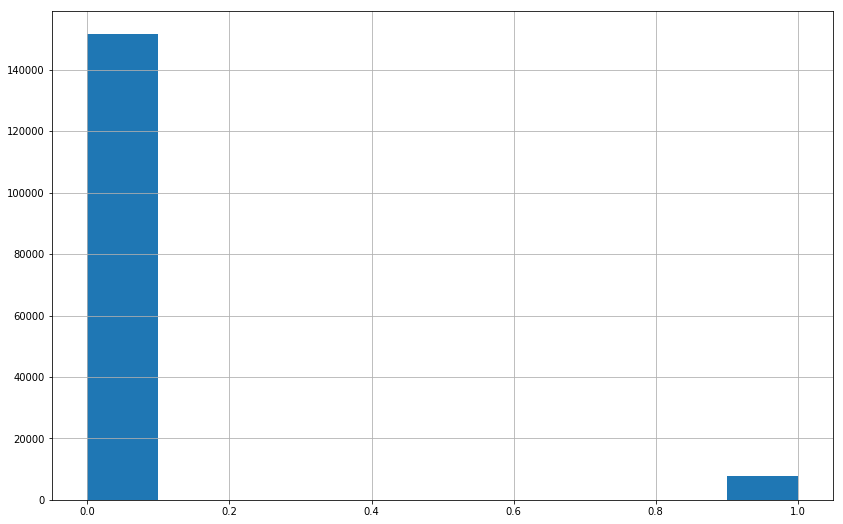

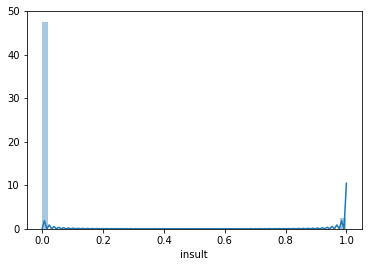

identity_hate
null values = 0
is_unique : No
{0, 1}
Counter({0: 158166, 1: 1405})
max = 1  min = 0
non zero values = 1405   zero values = 158166
       identity_hate
count  159571.000000
mean        0.008805
std         0.093420
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000 

 



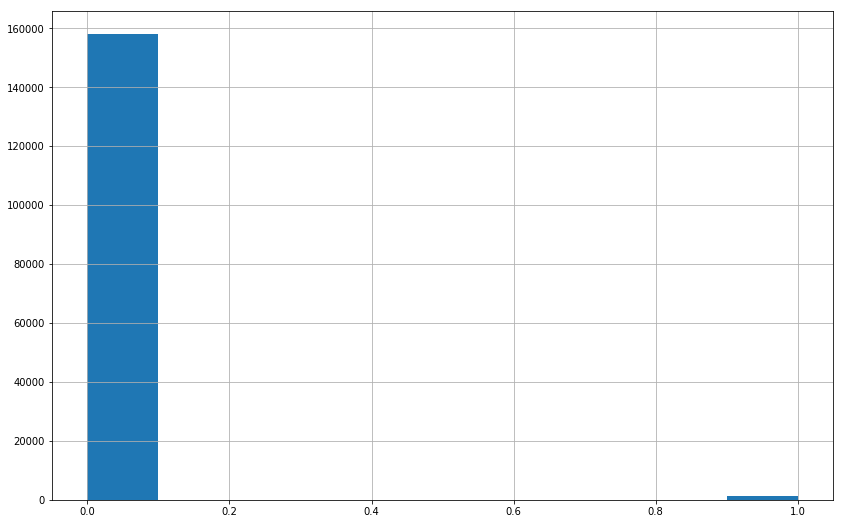

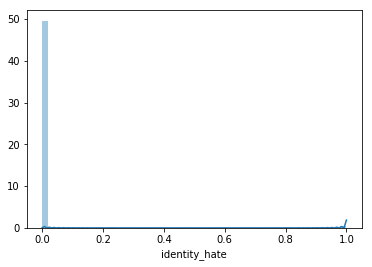

In [32]:
for i in train.columns:
    if i not in ['id','comment_text']:
        print(i)
        describe(data=train[i])

In [6]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


<h2> Cleaning steps </h2>

<h3>Lowwercase<h3>

In [6]:
train['comment_text']=train['comment_text'].str.lower()
test['comment_text']=test['comment_text'].str.lower()

<h3>Punctuation removal using translator<h3>

In [14]:
train['comment_text']=train['comment_text'].apply(lambda x:remove_punctuation(x))
test['comment_text']=test['comment_text'].apply(lambda x:remove_punctuation(x))

In [15]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,\nmore\ni cant make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [ ]:
print(train.shape[0])
for i in range(train.shape[0]):
    if i%25000==0:
        print(i)
    train['comment_text'][i]=clean(strr=train['comment_text'][i],stem=True,is_sent=True)

159571
0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
print(test.shape[0])
for i in range(test.shape[0]):
    if i%25000==0:
        print(i)
    test['comment_text'][i]=clean(strr=test['comment_text'][i],stem=True,is_sent=True)

In [48]:
toxic_data=np.array(train['comment_text'][train['toxic']==1])
toxic_data=pd.DataFrame(toxic_data)

severe_toxic_data=np.array(train['comment_text'][train['severe_toxic']==1])
severe_toxic_data=pd.DataFrame(severe_toxic_data)

obscene_data=np.array(train['comment_text'][train['obscene']==1])
obscene_data=pd.DataFrame(obscene_data)

threat_data=np.array(train['comment_text'][train['threat']==1])
threat_data=pd.DataFrame(threat_data)

insult_data=np.array(train['comment_text'][train['insult']==1])
insult_data=pd.DataFrame(insult_data)

identity_hate_data=np.array(train['comment_text'][train['identity_hate']==1])
identity_hate_data=pd.DataFrame(identity_hate_data)

not_any_data=np.array(train['comment_text'][(train['identity_hate']!=1)&(
    train['insult']!=1)&(train['threat']!=1) &(train['obscene']!=1)&(train['severe_toxic']!=1)&(train['toxic']!=1)])
not_any_data=pd.DataFrame(not_any_data)

In [52]:
new_train={'toxic':toxic_data,'severe_toxic':severe_toxic_data,
           'obscene':obscene_data,'threat':threat_data,'insult':insult_data,
          'identity_hate':identity_hate_data,'not_any':not_any_data}

In [57]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width',500)

In [40]:
bag_of_train={}
for i in ['toxic','severe_toxic','obscene',
         'threat','insult','identity_hate','not_any']:
    li=[]
    for j in range(new_train[i].shape[0]):
        for k in clean(new_train[i].values.ravel()[j]):
            li.append(k)
    print(len(li),'  ',len(set(li)))
    bag_of_train[i]=list(set(li))

167073    21682
13102    4032
87285    14225
4644    1907
77925    13125
14179    4564
2415765    139848


In [41]:
mega_li=bag_of_train['not_any']
for i in ['toxic','severe_toxic','obscene',
         'threat','insult','identity_hate']:
    mega_li=list(set(mega_li).intersection(set(bag_of_train[i])))
    print(len(mega_li))

14442
3177
3149
1118
1117
969


In [42]:
mega_li

['plain',
 'prove',
 'dn',
 'ass',
 'barnstar',
 'hear',
 'jump',
 'human',
 'wank',
 'social',
 'wait',
 'e',
 'homo',
 'head',
 'smoke',
 'god',
 'isra',
 'allow',
 'razor',
 'yank',
 'spend',
 'rot',
 'di',
 'dirti',
 'anyon',
 'disabl',
 'quick',
 'hit',
 'girl',
 'your',
 'slaughter',
 'els',
 'name',
 'instead',
 'issu',
 'ahead',
 'she',
 'race',
 'enjoy',
 'anywher',
 'want',
 'educ',
 'roll',
 'r',
 'hard',
 'proof',
 'guess',
 'speech',
 'meat',
 'seen',
 'cock',
 'nation',
 'came',
 '1',
 'boss',
 'nazi',
 'inform',
 'mouth',
 'prick',
 'pet',
 'user',
 'userpag',
 'ill',
 'fk',
 'semit',
 'smelli',
 'work',
 'onto',
 'report',
 'addit',
 'like',
 'irish',
 'fascist',
 'gut',
 'dig',
 'crew',
 'today',
 'sore',
 'lame',
 'tri',
 'feel',
 'censor',
 'someday',
 'famili',
 'track',
 '100',
 'ok',
 'otherwis',
 'filthi',
 'asham',
 'total',
 'member',
 'send',
 'yeah',
 'signific',
 'heard',
 'far',
 'id',
 'pay',
 'honestli',
 'ugli',
 'believ',
 'joke',
 'car',
 'fat',
 'acco

In [150]:
# for i in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
#     plot(x=i,data=train,name=i)    
#     print(train[i].value_counts()[1]/train[i].value_counts()[0],'  ',train[i].value_counts()[1],'\n')

In [151]:
clean(strr=np.array(train['comment_text'][train['toxic']==1].head())[3],is_sent=True)

'knowledg howev articl actual chemistri whathavey typo whether assum educ stupid would see vandal misread say confirm saw refut system phrase metal soon amount soviet know dont someon inde word could begin mean anyth way subject'

In [152]:
np.array(train['comment_text'][train['toxic']==1].head())[3]

'"\n\n Stupid? \n\nAs soon as I saw the phrase ""metal is stupid"" at the very beginning of the article, I assumed I misread it. When I confirmed that it did indeed say ""metal is stupid,"" I then assumed it was vandalism. However, I don\'t know anything about chemistry (See: Soviet education system) so if the word ""stupid"" has some other meaning in chemistry, I would have no way of knowing or refuting it. Could someone that actually has some amount of knowledge on this subject confirm whether this is or is not vandalism or a typo or what-have-you? "'